In [1]:
# from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import torch_audiomentations as TA

In [2]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [3]:
from src import *

In [4]:
audio, sr = load_audio('05_RX100', return_sr=True)
config = load_config_locally('010_eyedea_RX100_3/0')
transform_to_spectrogram = create_transformation(config)

In [13]:
# augment = Compose([
    # AddGaussianNoise(min_amplitude=0.05, max_amplitude=0.05, p=1.0),
    # TimeStretch(min_rate=0.11, max_rate=1.25, p=1.0),
    # PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    # Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
# ])

augment = TA.Compose(
    transforms=[
        # TA.AddColoredNoise(p=1.0),
        # TA.PitchShift(config.sr, p=1.0),
        # TA.Gain(p=1.0),
        # TA.HighPassFilter(p=1.0),
        TA.LowPassFilter(p=1.0),
    ]
)



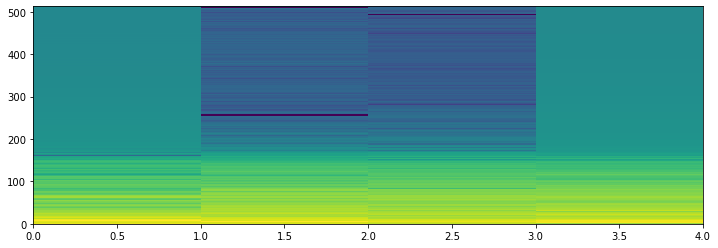

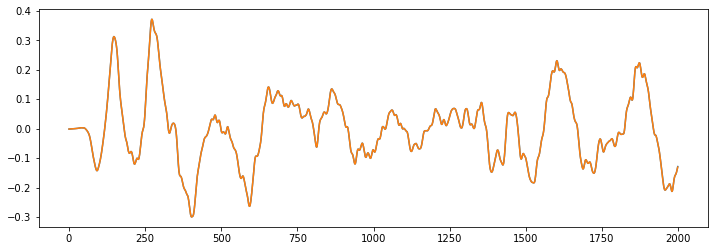

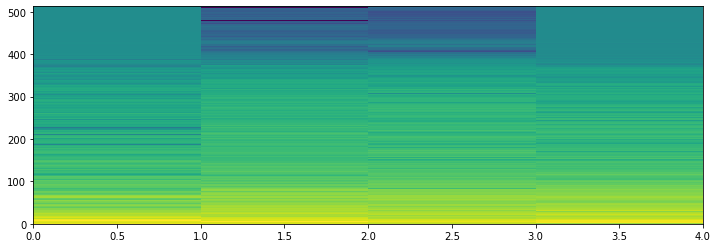

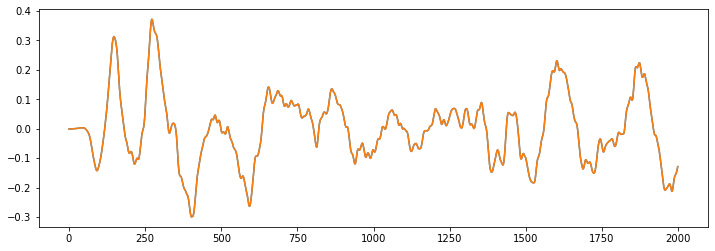

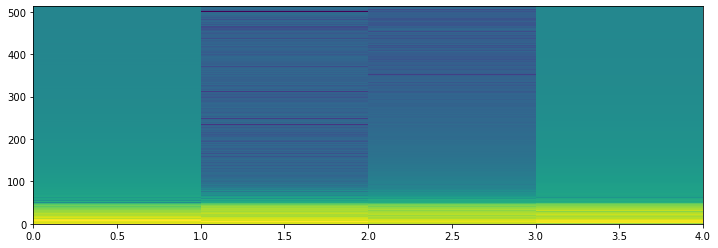

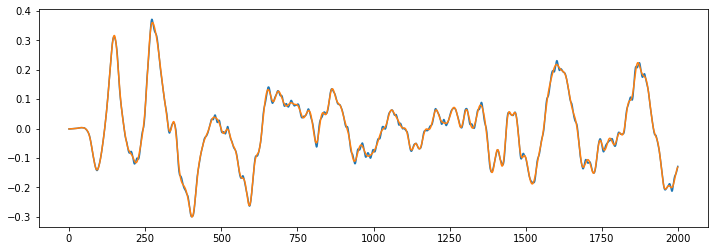

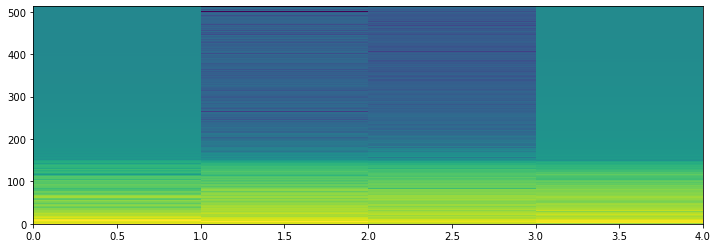

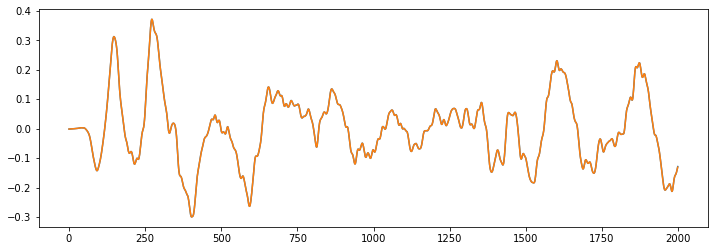

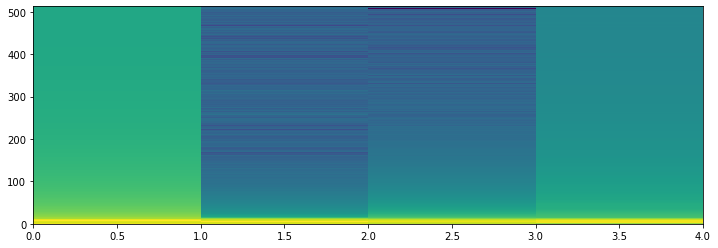

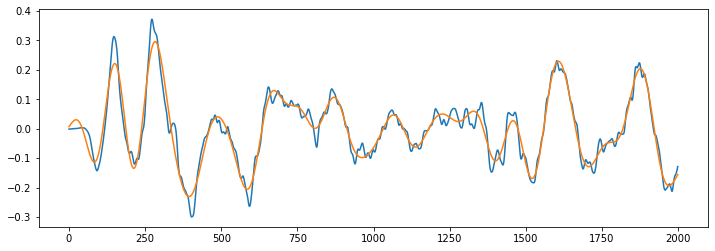

In [17]:
n_samples = config.sr * 1
n_samples = 2000

for i in range(5):
    samples = audio[:n_samples]
    samples = samples.reshape(1, 1, -1)
    augmented_samples = augment(samples, sample_rate=config.sr)
    augmented_samples = augmented_samples.squeeze()

    features = transform_to_spectrogram(augmented_samples).squeeze()
    plt.figure(figsize=(12, 4))
    plt.pcolormesh(features)

    plt.figure(figsize=(12, 4))
    plt.plot(samples.flatten())
    plt.plot(augmented_samples)
    # break

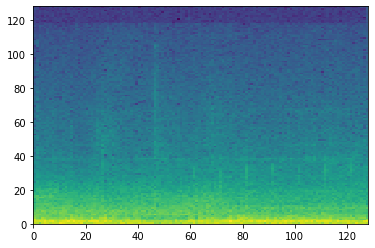

In [98]:
config = load_config_locally('020_RX100_resized_128/0')
transform_to_spectrogram = create_transformation(config)

samples = audio[:config.sr * 5]
features = transform_to_spectrogram(samples).squeeze()
plt.pcolormesh(features)

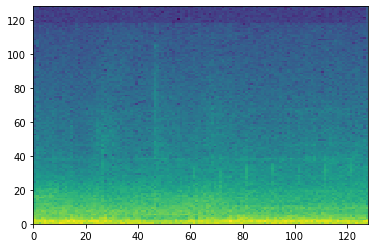

In [99]:
samples = samples.reshape(1, 1, -1)
augmented_samples = augment(samples, sample_rate=config.sr).squeeze()
features = transform_to_spectrogram(augmented_samples).squeeze()
plt.pcolormesh(features)